# MCP Neuron - Laboratory number 2

## Libraries

In [1]:
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt
import seaborn as sns

## Data preparation

### Preprocessing function

In [2]:
def preprocess_data(df_X):
    df_X.sort_values(by=['class'])
    df_X = df_X[:100]
    dictionary = {'class' : dict(zip(df_X['class'].unique(),[-1,1]))}
    return df_X.replace(dictionary)

### Read dataset

In [3]:
df_X = preprocess_data(pd.read_csv('iris.csv'))

### Target and test samples preparation

In [4]:
data_size = len(df_X)
train_count = int(data_size*0.8)

In [5]:
df_X_train = df_X.sample(train_count)
print(df_X_train.shape)
df_X_target = df_X.sample(data_size - train_count)
print(df_X_target.shape)

(80, 5)
(20, 5)


## Neuron training

### MPC neuron class

In [6]:
class MCP_neuron:
    def __init__(self):
        self.__activization = self.__unit_step_function

    def predict(self,X):
        return self.__activization(self.__net_input(X))

    def __net_input(self,X):
        return X.dot(self.__weights) + self.__bias
    
    def __unit_step_function(self,net_input):
        return np.where(net_input < 0, -1, 1)

    def get_params(self):
        return (self.__bias,self.__weights.copy())
    
    def __params_init(self,m,setting):
        if setting == 'rnd':
            self.__weights = np.random.normal(loc=0.0,scale=0.2,size=(m,1))
            self.__bias =  np.random.normal(loc=0.0,scale=0.2)
        else:
            self.__weights = np.zeros((m,1))
            self.__bias =0

    def rosenblatt_learning(self,X,y,learning_rate,param_init_setting='zeros',max_iter = 100):
        (_,m) = X.shape
        self.__params_init(m,param_init_setting)
        iteration_count = 0
        train = True
        while iteration_count < max_iter and train:
            prev_bias = self.__bias
            prev_weights = self.__weights.copy()
            for xi,yi in zip(X,y):
                prediction = self.predicts(xi)
                error = (yi - prediction)[0]
                delta_bias = learning_rate * error
                delta_weights = (learning_rate * error * xi).reshape(-1,1)
                self.__bias += delta_bias
                self.__weights += delta_weights
            if (self.__bias == prev_bias) and (prev_weights == self.__weights).all():
                train = False
            iteration_count +=1
        print('Iterations passed : {0}'.format(iteration_count))

### Neuron init

In [7]:
neuron = MCP_neuron()

### Accuracy function

In [8]:
def accuracy(labels,prediction):
    (n,_)=labels.shape
    correct =  np.count_nonzero((labels - prediction) == 0)
    return correct/n * 100

### Training

#### Getting the raw samples

In [9]:
X = df_X_train.values[:,:4]
y = df_X_train['class'].values.reshape((-1,1))

#### Training experiments

##### Training with learning rate = 0.1 and initial zeros params

In [10]:
learning_rate = 0.1
neuron.rosenblatt_learning(X,y,learning_rate)
(bias,weights) = neuron.get_params()
print('learning rate : {2}\nbias : {0}\nweights :\n {1}'.format(bias,weights,learning_rate))

Iterations passed : 2
learning rate : 0.1
bias : -0.2
weights :
 [[-0.3 ]
 [-1.12]
 [ 1.38]
 [ 0.56]]


In [11]:
# check for correct work
prediction = neuron.predict(X)
print(prediction.T)
print('accuracy = {0}%'.format(accuracy(df_X_train[['class']].values,prediction)))

[[-1 -1  1 -1  1 -1 -1  1  1  1  1 -1  1  1  1  1  1 -1  1 -1  1  1 -1  1
  -1  1 -1 -1  1 -1 -1 -1  1  1 -1  1 -1  1  1 -1 -1 -1 -1  1 -1 -1  1  1
  -1  1  1  1 -1 -1 -1 -1 -1  1  1  1  1  1  1  1  1  1 -1  1  1 -1 -1 -1
  -1 -1 -1  1 -1  1 -1  1]]
accuracy = 100.0%


##### Training with learning rate = 0.0001 and initial zeros params

In [12]:
learning_rate = 0.0001
neuron.rosenblatt_learning(X,y,learning_rate)
(bias,weights) = neuron.get_params()
print('learning rate : {2}\nbias : {0}\nweights :\n{1}'.format(bias,weights,learning_rate))

Iterations passed : 2
learning rate : 0.0001
bias : -0.0002
weights :
[[-0.0003 ]
 [-0.00112]
 [ 0.00138]
 [ 0.00056]]


In [13]:
prediction = neuron.predict(X)
print(prediction.T)
print('accuracy = {0}%'.format(accuracy(df_X_train[['class']].values,prediction)))

[[-1 -1  1 -1  1 -1 -1  1  1  1  1 -1  1  1  1  1  1 -1  1 -1  1  1 -1  1
  -1  1 -1 -1  1 -1 -1 -1  1  1 -1  1 -1  1  1 -1 -1 -1 -1  1 -1 -1  1  1
  -1  1  1  1 -1 -1 -1 -1 -1  1  1  1  1  1  1  1  1  1 -1  1  1 -1 -1 -1
  -1 -1 -1  1 -1  1 -1  1]]
accuracy = 100.0%


##### Training with learning rate = 48 and initial zeros params

In [14]:
learning_rate = 48
neuron.rosenblatt_learning(X,y,learning_rate)
(bias,weights) = neuron.get_params()
print('learning rate : {2}\nbias : {0}\nweights :\n{1}'.format(bias,weights,learning_rate))

Iterations passed : 2
learning rate : 48
bias : -96
weights :
[[-144. ]
 [-537.6]
 [ 662.4]
 [ 268.8]]


In [15]:
prediction = neuron.predict(X)
print(prediction.T)
print('accuracy = {0}%'.format(accuracy(df_X_train[['class']].values,prediction)))

[[-1 -1  1 -1  1 -1 -1  1  1  1  1 -1  1  1  1  1  1 -1  1 -1  1  1 -1  1
  -1  1 -1 -1  1 -1 -1 -1  1  1 -1  1 -1  1  1 -1 -1 -1 -1  1 -1 -1  1  1
  -1  1  1  1 -1 -1 -1 -1 -1  1  1  1  1  1  1  1  1  1 -1  1  1 -1 -1 -1
  -1 -1 -1  1 -1  1 -1  1]]
accuracy = 100.0%


##### Training with learning rate = 0.1 and initial random params ~ N(0,0.2)

In [16]:
neuron.rosenblatt_learning(X,y,0.1,'rnd')
(bias,weights) = neuron.get_params()
print('bias : {0}\nweights :\n{1}'.format(bias,weights))

Iterations passed : 2
bias : 0.14777375522601094
weights :
[[-0.22857713]
 [-1.01846566]
 [ 1.15651173]
 [ 0.83349783]]


In [17]:
prediction = neuron.predict(X)
print(prediction.T)
print('accuracy = {0}%'.format(accuracy(df_X_train[['class']].values,prediction)))

[[-1 -1  1 -1  1 -1 -1  1  1  1  1 -1  1  1  1  1  1 -1  1 -1  1  1 -1  1
  -1  1 -1 -1  1 -1 -1 -1  1  1 -1  1 -1  1  1 -1 -1 -1 -1  1 -1 -1  1  1
  -1  1  1  1 -1 -1 -1 -1 -1  1  1  1  1  1  1  1  1  1 -1  1  1 -1 -1 -1
  -1 -1 -1  1 -1  1 -1  1]]
accuracy = 100.0%


##### Training with learning rate = 0.0001 and initial random params ~ N(0,0.2)

In [18]:
neuron.rosenblatt_learning(X,y,0.001,'rnd')
(bias,weights) = neuron.get_params()
print('bias : {0}\nweights :\n{1}'.format(bias,weights))

Iterations passed : 7
bias : -0.1892800569260035
weights :
[[-0.10360733]
 [ 0.11599995]
 [ 0.11762594]
 [ 0.10086823]]


In [19]:
prediction = neuron.predict(X)
print(prediction.T)
print('accuracy = {0}%'.format(accuracy(df_X_train[['class']].values,prediction)))

[[-1 -1  1 -1  1 -1 -1  1  1  1  1 -1  1  1  1  1  1 -1  1 -1  1  1 -1  1
  -1  1 -1 -1  1 -1 -1 -1  1  1 -1  1 -1  1  1 -1 -1 -1 -1  1 -1 -1  1  1
  -1  1  1  1 -1 -1 -1 -1 -1  1  1  1  1  1  1  1  1  1 -1  1  1 -1 -1 -1
  -1 -1 -1  1 -1  1 -1  1]]
accuracy = 100.0%


##### Training with learning rate = 48 and initial random params ~ N(0,0.2)

In [20]:
neuron.rosenblatt_learning(X,y,48,'rnd')
(bias,weights) = neuron.get_params()
print('bias : {0}\nweights :\n{1}'.format(bias,weights))

Iterations passed : 2
bias : -95.89660087332162
weights :
[[-143.93866824]
 [-537.5264463 ]
 [ 662.50996747]
 [ 268.78158516]]


In [21]:
prediction = neuron.predict(X)
print(prediction.T)
print('accuracy = {0}%'.format(accuracy(df_X_train[['class']].values,prediction)))

[[-1 -1  1 -1  1 -1 -1  1  1  1  1 -1  1  1  1  1  1 -1  1 -1  1  1 -1  1
  -1  1 -1 -1  1 -1 -1 -1  1  1 -1  1 -1  1  1 -1 -1 -1 -1  1 -1 -1  1  1
  -1  1  1  1 -1 -1 -1 -1 -1  1  1  1  1  1  1  1  1  1 -1  1  1 -1 -1 -1
  -1 -1 -1  1 -1  1 -1  1]]
accuracy = 100.0%


#### Findings

Since the decision boundary can be represented by the plane,
convergence rate depends on speed of approaching the desired
proportion of scales, which depends on learning rate and 
... somthing else ...

## Prediction of the target samples

### Retrain

In [22]:
learning_rate = 0.1
neuron.rosenblatt_learning(X,y,learning_rate)

Iterations passed : 2


## Predict

In [23]:
X_target = df_X_target.values[:,:4]
y_target = np.array([df_X_target['class'].values]).T

In [24]:
prediction = neuron.predict(X_target)
df_X_target['prediction'] = prediction
print(df_X_target[['class','prediction']])
print('accuracy = {0}%'.format(accuracy(y_target,prediction)))

    class  prediction
8      -1          -1
59      1           1
93      1           1
21     -1          -1
53      1           1
5      -1          -1
9      -1          -1
22     -1          -1
64      1           1
65      1           1
19     -1          -1
90      1           1
27     -1          -1
41     -1          -1
91      1           1
54      1           1
62      1           1
35     -1          -1
12     -1          -1
85      1           1
accuracy = 100.0%


### Class and prediction ilustration

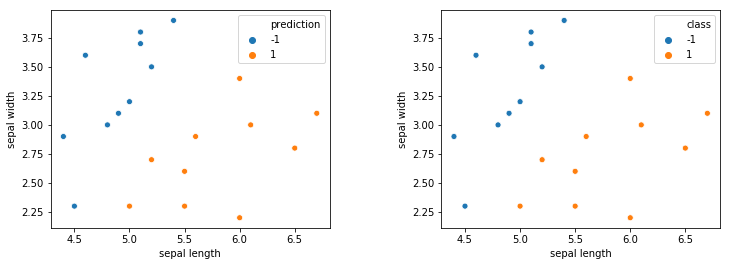

In [25]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
#prediction
sns.scatterplot(data=df_X_target,palette=sns.color_palette(n_colors=2),legend="full", x="sepal length",y="sepal width",hue="prediction")
plt.subplot(1,2,2)
#class
sns.scatterplot(data=df_X_target,palette=sns.color_palette(n_colors=2),legend="full", x="sepal length",y="sepal width",hue="class")
plt.subplots_adjust(hspace=0.4, wspace=0.4)
plt.show()